In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
sns.set_style('darkgrid')
import datetime

In [32]:
data=pd.read_csv('Train.csv')

In [33]:
data.head()

,idx,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1480107904,11/25/2016 12:00:00 AM,11:05:04,288.44,46,30.48,101,129.84,13.50,06:37:00,17:42:00
1,1,1472818508,9/2/2016 12:00:00 AM,02:15:08,2.79,50,30.42,75,173.90,6.75,06:07:00,18:37:00
2,2,1475804719,10/6/2016 12:00:00 AM,15:45:19,118.05,54,30.42,100,7.35,1.12,06:15:00,18:07:00
3,3,1482533149,12/23/2016 12:00:00 AM,12:45:49,853.17,58,30.44,57,81.67,11.25,06:54:00,17:50:00
4,4,1481883019,12/16/2016 12:00:00 AM,00:10:19,1.24,42,30.24,103,171.13,2.25,06:50:00,17:46:00


In [34]:
data['UNIXTime'] = pd.to_datetime(data['UNIXTime']).dt.date.astype(str)

In [35]:
data.head()

,idx,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1970-01-01,11/25/2016 12:00:00 AM,11:05:04,288.44,46,30.48,101,129.84,13.50,06:37:00,17:42:00
1,1,1970-01-01,9/2/2016 12:00:00 AM,02:15:08,2.79,50,30.42,75,173.90,6.75,06:07:00,18:37:00
2,2,1970-01-01,10/6/2016 12:00:00 AM,15:45:19,118.05,54,30.42,100,7.35,1.12,06:15:00,18:07:00
3,3,1970-01-01,12/23/2016 12:00:00 AM,12:45:49,853.17,58,30.44,57,81.67,11.25,06:54:00,17:50:00
4,4,1970-01-01,12/16/2016 12:00:00 AM,00:10:19,1.24,42,30.24,103,171.13,2.25,06:50:00,17:46:00


In [37]:
data['UNIXTime'].unique()

array(['1970-01-01'], dtype=object)

In [4]:
tdata=pd.read_csv('Test.csv')

In [18]:
data.describe()

,idx,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000
mean,13074.000000,208.621000,51.135110,30.423005,74.970936,143.368247,6.262052
std,7548.710431,316.089736,6.212018,0.054679,26.008728,83.424186,3.503488
min,0.000000,1.110000,35.000000,30.190000,8.000000,0.090000,0.000000
25%,6537.000000,1.230000,46.000000,30.400000,56.000000,81.580000,3.370000
50%,13074.000000,2.720000,50.000000,30.430000,85.000000,147.320000,5.620000
75%,19611.000000,360.260000,55.000000,30.460000,97.000000,179.240000,7.870000
max,26148.000000,1601.260000,71.000000,30.560000,103.000000,359.940000,40.500000


In [6]:
for i in data[data['Speed'] == 0].iterrows():
    data.loc[i[0],"Speed"] = data["Speed"].median()

In [7]:
data['Date'] = pd.to_datetime(data['Data']).dt.date.astype(str)
data['TimeSunRise'] = data['Date'] + ' ' + data['TimeSunRise']
data['TimeSunSet'] = data['Date'] + ' ' + data['TimeSunSet']
data['Date'] = data['Date'] + ' ' + data['Time']

#data = data.sort_values('Date').reset_index(drop=True)
data.set_index('Date', inplace=True)
data.drop(['Data', 'Time', 'UNIXTime'], axis=1, inplace=True)
data.index = pd.to_datetime(data.index)
data.head()

,idx,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
Date,,,,,,,,,
2016-11-25 11:05:04,0,288.44,46,30.48,101,129.84,13.50,2016-11-25 06:37:00,2016-11-25 17:42:00
2016-09-02 02:15:08,1,2.79,50,30.42,75,173.90,6.75,2016-09-02 06:07:00,2016-09-02 18:37:00
2016-10-06 15:45:19,2,118.05,54,30.42,100,7.35,1.12,2016-10-06 06:15:00,2016-10-06 18:07:00
2016-12-23 12:45:49,3,853.17,58,30.44,57,81.67,11.25,2016-12-23 06:54:00,2016-12-23 17:50:00
2016-12-16 00:10:19,4,1.24,42,30.24,103,171.13,2.25,2016-12-16 06:50:00,2016-12-16 17:46:00


In [8]:
tdata['Date'] = pd.to_datetime(tdata['Data']).dt.date.astype(str)
tdata['TimeSunRise'] = tdata['Date'] + ' ' + tdata['TimeSunRise']
tdata['TimeSunSet'] = tdata['Date'] + ' ' + tdata['TimeSunSet']
tdata['Date'] = tdata['Date'] + ' ' + tdata['Time']

#tdata = tdata.sort_values('Date').reset_index(drop=True)
tdata.set_index('Date', inplace=True)
tdata.drop(['Data', 'Time', 'UNIXTime'], axis=1, inplace=True)
tdata.index = pd.to_datetime(tdata.index)
tdata.head()

,idx,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
Date,,,,,,,,
2016-12-26 08:00:50,0,48,30.47,101,187.78,4.50,2016-12-26 06:55:00,2016-12-26 17:51:00
2016-12-26 07:55:40,1,48,30.47,101,133.40,10.12,2016-12-26 06:55:00,2016-12-26 17:51:00
2016-12-26 07:50:49,2,48,30.47,101,160.69,5.62,2016-12-26 06:55:00,2016-12-26 17:51:00
2016-12-26 07:45:51,3,48,30.47,101,144.56,7.87,2016-12-26 06:55:00,2016-12-26 17:51:00
2016-12-26 07:40:39,4,48,30.47,101,169.05,10.12,2016-12-26 06:55:00,2016-12-26 17:51:00


In [9]:
data.rename({
    'Radiation': 'Radiation(W/m2)', 'Temperature': 'Temperature(F)', 'Pressure': 'Pressure(mm Hg)', 'Humidity': 'Humidity(%)',
    'Speed': 'Speed(mph)'
}, axis=1, inplace=True)
data.head()

,idx,Radiation(W/m2),Temperature(F),Pressure(mm Hg),Humidity(%),WindDirection(Degrees),Speed(mph),TimeSunRise,TimeSunSet
Date,,,,,,,,,
2016-11-25 11:05:04,0,288.44,46,30.48,101,129.84,13.50,2016-11-25 06:37:00,2016-11-25 17:42:00
2016-09-02 02:15:08,1,2.79,50,30.42,75,173.90,6.75,2016-09-02 06:07:00,2016-09-02 18:37:00
2016-10-06 15:45:19,2,118.05,54,30.42,100,7.35,1.12,2016-10-06 06:15:00,2016-10-06 18:07:00
2016-12-23 12:45:49,3,853.17,58,30.44,57,81.67,11.25,2016-12-23 06:54:00,2016-12-23 17:50:00
2016-12-16 00:10:19,4,1.24,42,30.24,103,171.13,2.25,2016-12-16 06:50:00,2016-12-16 17:46:00


In [10]:
tdata.rename({
    'Radiation': 'Radiation(W/m2)', 'Temperature': 'Temperature(F)', 'Pressure': 'Pressure(mm Hg)', 'Humidity': 'Humidity(%)',
    'Speed': 'Speed(mph)'
}, axis=1, inplace=True)
tdata.head()


,idx,Temperature(F),Pressure(mm Hg),Humidity(%),WindDirection(Degrees),Speed(mph),TimeSunRise,TimeSunSet
Date,,,,,,,,
2016-12-26 08:00:50,0,48,30.47,101,187.78,4.50,2016-12-26 06:55:00,2016-12-26 17:51:00
2016-12-26 07:55:40,1,48,30.47,101,133.40,10.12,2016-12-26 06:55:00,2016-12-26 17:51:00
2016-12-26 07:50:49,2,48,30.47,101,160.69,5.62,2016-12-26 06:55:00,2016-12-26 17:51:00
2016-12-26 07:45:51,3,48,30.47,101,144.56,7.87,2016-12-26 06:55:00,2016-12-26 17:51:00
2016-12-26 07:40:39,4,48,30.47,101,169.05,10.12,2016-12-26 06:55:00,2016-12-26 17:51:00


In [11]:
def total_seconds(series):
    return series.hour*60*60 + series.minute*60 + series.second

In [12]:
data['MonthOfYear'] = data.index.strftime('%m').astype(int)
data['DayOfYear'] = data.index.strftime('%j').astype(int)
data['WeekOfYear'] = data.index.strftime('%U').astype(int)
data['TimeOfDay(h)'] = data.index.hour
data['TimeOfDay(m)'] = data.index.hour*60 + data.index.minute
data['TimeOfDay(s)'] = total_seconds(data.index)
data['TimeSunRise'] = pd.to_datetime(data['TimeSunRise'])
data['TimeSunSet'] = pd.to_datetime(data['TimeSunSet'])
data['DayLength(s)'] = total_seconds(data['TimeSunSet'].dt) - total_seconds(data['TimeSunRise'].dt)
data['TimeAfterSunRise(s)'] = total_seconds(data.index) - total_seconds(data['TimeSunRise'].dt)
data['TimeBeforeSunSet(s)'] = total_seconds(data['TimeSunSet'].dt) - total_seconds(data.index)
data['RelativeTOD'] = data['TimeAfterSunRise(s)'] / data['DayLength(s)']
data.drop(['TimeSunRise','TimeSunSet'], inplace=True, axis=1)
data.head()

,idx,Radiation(W/m2),Temperature(F),Pressure(mm Hg),Humidity(%),WindDirection(Degrees),Speed(mph),MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s),TimeAfterSunRise(s),TimeBeforeSunSet(s),RelativeTOD
Date,,,,,,,,,,,,,,,,,
2016-11-25 11:05:04,0,288.44,46,30.48,101,129.84,13.50,11,330,47,11,665,39904,39900,16084,23816,0.403108
2016-09-02 02:15:08,1,2.79,50,30.42,75,173.90,6.75,9,246,35,2,135,8108,45000,-13912,58912,-0.309156
2016-10-06 15:45:19,2,118.05,54,30.42,100,7.35,1.12,10,280,40,15,945,56719,42720,34219,8501,0.801007
2016-12-23 12:45:49,3,853.17,58,30.44,57,81.67,11.25,12,358,51,12,765,45949,39360,21109,18251,0.536306
2016-12-16 00:10:19,4,1.24,42,30.24,103,171.13,2.25,12,351,50,0,10,619,39360,-23981,63341,-0.609273


In [13]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[1.73198457 0.25252489 0.82665702 ... 0.15705494 0.0954772  0.13174575]
 [1.7318521  0.65119146 0.1827316  ... 1.3622439  1.50607355 1.3158065 ]
 [1.73171962 0.2865412  0.46119382 ... 0.57157894 0.5200711  0.52971795]
 ...
 [1.73171962 0.6561585  0.34371295 ... 1.47265393 1.49835659 1.46034358]
 [1.7318521  0.65606359 0.34371295 ... 1.14062027 1.25060995 1.11793409]
 [1.73198457 0.61060094 0.82665702 ... 0.74514504 0.84052577 0.74694916]]


In [320]:
threshold = 3
dd=np.where(z > 3)

In [321]:
orig_data = data[(z < 3).all(axis=1)]

In [322]:
tt=data[(z>3)]

In [332]:
frames=[data,tt]

In [333]:
data=pd.concat(frames)

In [334]:
data.shape

(29273, 17)

In [301]:
tt.shape

(781, 17)

In [12]:
data.describe()

,idx,Radiation(W/m2),Temperature(F),Pressure(mm Hg),Humidity(%),WindDirection(Degrees),Speed(mph),MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s),TimeAfterSunRise(s),TimeBeforeSunSet(s),RelativeTOD
count,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000
mean,13074.000000,208.621000,51.135110,30.423005,74.970936,143.368247,6.262052,10.524724,306.093617,43.869479,11.550881,720.559104,43250.956174,41433.449845,19992.947073,21440.502773,0.482358
std,7548.710431,316.089736,6.212018,0.054679,26.008728,83.424186,3.503488,1.096730,34.772705,4.962493,6.902891,414.432039,24865.983359,1796.586821,24889.519027,24880.732942,0.601554
min,0.000000,1.110000,35.000000,30.190000,8.000000,0.090000,0.000000,9.000000,245.000000,35.000000,0.000000,0.000000,1.000000,39360.000000,-25016.000000,-22416.000000,-0.634602
25%,6537.000000,1.230000,46.000000,30.400000,56.000000,81.580000,3.370000,10.000000,277.000000,40.000000,6.000000,360.000000,21621.000000,39720.000000,-1600.000000,-142.000000,-0.038364
50%,13074.000000,2.720000,50.000000,30.430000,85.000000,147.320000,5.620000,11.000000,306.000000,44.000000,12.000000,720.000000,43221.000000,41040.000000,19981.000000,21359.000000,0.483697
75%,19611.000000,360.260000,55.000000,30.460000,97.000000,179.240000,7.870000,11.000000,334.000000,48.000000,18.000000,1080.000000,64820.000000,42900.000000,41544.000000,43056.000000,1.003444
max,26148.000000,1601.260000,71.000000,30.560000,103.000000,359.940000,40.500000,12.000000,366.000000,52.000000,23.000000,1436.000000,86185.000000,45060.000000,64087.000000,67072.000000,1.566061


(25482, 6)

In [14]:
tdata.head()

,idx,Temperature(F),Pressure(mm Hg),Humidity(%),WindDirection(Degrees),Speed(mph),TimeSunRise,TimeSunSet
Date,,,,,,,,
2016-12-26 08:00:50,0,48,30.47,101,187.78,4.50,2016-12-26 06:55:00,2016-12-26 17:51:00
2016-12-26 07:55:40,1,48,30.47,101,133.40,10.12,2016-12-26 06:55:00,2016-12-26 17:51:00
2016-12-26 07:50:49,2,48,30.47,101,160.69,5.62,2016-12-26 06:55:00,2016-12-26 17:51:00
2016-12-26 07:45:51,3,48,30.47,101,144.56,7.87,2016-12-26 06:55:00,2016-12-26 17:51:00
2016-12-26 07:40:39,4,48,30.47,101,169.05,10.12,2016-12-26 06:55:00,2016-12-26 17:51:00


In [268]:
data.head()

,idx,Radiation(W/m2),Temperature(F),Pressure(mm Hg),Humidity(%),WindDirection(Degrees),Speed(mph),MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s),TimeAfterSunRise(s),TimeBeforeSunSet(s),RelativeTOD
Date,,,,,,,,,,,,,,,,,
2016-11-25 11:05:04,0,288.44,46,30.48,101,129.84,13.50,11,330,47,11,665,39904,39900,16084,23816,0.403108
2016-09-02 02:15:08,1,2.79,50,30.42,75,173.90,6.75,9,246,35,2,135,8108,45000,-13912,58912,-0.309156
2016-10-06 15:45:19,2,118.05,54,30.42,100,7.35,1.12,10,280,40,15,945,56719,42720,34219,8501,0.801007
2016-12-23 12:45:49,3,853.17,58,30.44,57,81.67,11.25,12,358,51,12,765,45949,39360,21109,18251,0.536306
2016-12-16 00:10:19,4,1.24,42,30.24,103,171.13,2.25,12,351,50,0,10,619,39360,-23981,63341,-0.609273


In [15]:
tdata['MonthOfYear'] = tdata.index.strftime('%m').astype(int)
tdata['DayOfYear'] = tdata.index.strftime('%j').astype(int)
tdata['WeekOfYear'] = tdata.index.strftime('%U').astype(int)
tdata['TimeOfDay(h)'] = tdata.index.hour
tdata['TimeOfDay(m)'] = tdata.index.hour*60 + tdata.index.minute
tdata['TimeOfDay(s)'] = total_seconds(tdata.index)
tdata['TimeSunRise'] = pd.to_datetime(tdata['TimeSunRise'])
tdata['TimeSunSet'] = pd.to_datetime(tdata['TimeSunSet'])
tdata['DayLength(s)'] = total_seconds(tdata['TimeSunSet'].dt) - total_seconds(tdata['TimeSunRise'].dt)
tdata['TimeAfterSunRise(s)'] = total_seconds(tdata.index) - total_seconds(tdata['TimeSunRise'].dt)
tdata['TimeBeforeSunSet(s)'] = total_seconds(tdata['TimeSunSet'].dt) - total_seconds(tdata.index)
tdata['RelativeTOD'] = tdata['TimeAfterSunRise(s)'] / tdata['DayLength(s)']
tdata.drop(['TimeSunRise','TimeSunSet'], inplace=True, axis=1)
tdata.head()

,idx,Temperature(F),Pressure(mm Hg),Humidity(%),WindDirection(Degrees),Speed(mph),MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s),TimeAfterSunRise(s),TimeBeforeSunSet(s),RelativeTOD
Date,,,,,,,,,,,,,,,,
2016-12-26 08:00:50,0,48,30.47,101,187.78,4.50,12,361,52,8,480,28850,39360,3950,35410,0.100356
2016-12-26 07:55:40,1,48,30.47,101,133.40,10.12,12,361,52,7,475,28540,39360,3640,35720,0.092480
2016-12-26 07:50:49,2,48,30.47,101,160.69,5.62,12,361,52,7,470,28249,39360,3349,36011,0.085086
2016-12-26 07:45:51,3,48,30.47,101,144.56,7.87,12,361,52,7,465,27951,39360,3051,36309,0.077515
2016-12-26 07:40:39,4,48,30.47,101,169.05,10.12,12,361,52,7,460,27639,39360,2739,36621,0.069588


In [337]:
feats = [
    'Temperature(F)','DayOfYear','TimeOfDay(s)','DayLength(s)','Humidity(%)','Pressure(mm Hg)'
]
X =data[feats].values
y = data['Radiation(W/m2)'].values

X.shape
test=tdata[feats]

In [338]:
X.shape

(29273, 6)

In [16]:
data.describe()

,idx,Radiation(W/m2),Temperature(F),Pressure(mm Hg),Humidity(%),WindDirection(Degrees),Speed(mph),MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s),TimeAfterSunRise(s),TimeBeforeSunSet(s),RelativeTOD
count,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000
mean,13074.000000,208.621000,51.135110,30.423005,74.970936,143.368247,6.347161,10.524724,306.093617,43.869479,11.550881,720.559104,43250.956174,41433.449845,19992.947073,21440.502773,0.482358
std,7548.710431,316.089736,6.212018,0.054679,26.008728,83.424186,3.417537,1.096730,34.772705,4.962493,6.902891,414.432039,24865.983359,1796.586821,24889.519027,24880.732942,0.601554
min,0.000000,1.110000,35.000000,30.190000,8.000000,0.090000,1.120000,9.000000,245.000000,35.000000,0.000000,0.000000,1.000000,39360.000000,-25016.000000,-22416.000000,-0.634602
25%,6537.000000,1.230000,46.000000,30.400000,56.000000,81.580000,4.500000,10.000000,277.000000,40.000000,6.000000,360.000000,21621.000000,39720.000000,-1600.000000,-142.000000,-0.038364
50%,13074.000000,2.720000,50.000000,30.430000,85.000000,147.320000,5.620000,11.000000,306.000000,44.000000,12.000000,720.000000,43221.000000,41040.000000,19981.000000,21359.000000,0.483697
75%,19611.000000,360.260000,55.000000,30.460000,97.000000,179.240000,7.870000,11.000000,334.000000,48.000000,18.000000,1080.000000,64820.000000,42900.000000,41544.000000,43056.000000,1.003444
max,26148.000000,1601.260000,71.000000,30.560000,103.000000,359.940000,40.500000,12.000000,366.000000,52.000000,23.000000,1436.000000,86185.000000,45060.000000,64087.000000,67072.000000,1.566061


In [17]:
tdata.describe()

,idx,Temperature(F),Pressure(mm Hg),Humidity(%),WindDirection(Degrees),Speed(mph),MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s),DayLength(s),TimeAfterSunRise(s),TimeBeforeSunSet(s),RelativeTOD
count,6537.000000,6537.000000,6537.000000,6537.000000,6537.000000,6537.000000,6537.0,6537.000000,6537.000000,6537.000000,6537.000000,6537.000000,6537.000000,6537.000000,6537.000000,6537.000000
mean,3268.000000,47.836316,30.376486,81.613278,178.844800,6.738943,12.0,348.910509,49.967569,11.462598,715.331345,42947.021723,39437.154658,18421.542145,21015.612513,0.467062
std,1887.213687,4.847630,0.078843,21.306379,87.664437,4.788839,0.0,7.368084,1.124660,6.912098,415.039019,24902.847296,102.360061,24912.223275,24909.152941,0.631685
min,0.000000,34.000000,30.190000,20.000000,0.170000,0.000000,12.0,336.000000,48.000000,0.000000,0.000000,2.000000,39360.000000,-24861.000000,-22416.000000,-0.631631
25%,1634.000000,45.000000,30.320000,72.000000,126.110000,3.370000,12.0,344.000000,49.000000,5.000000,355.000000,21317.000000,39360.000000,-3251.000000,-497.000000,-0.082597
50%,3268.000000,47.000000,30.380000,93.000000,170.010000,5.620000,12.0,349.000000,50.000000,12.000000,720.000000,43202.000000,39420.000000,18590.000000,20845.000000,0.471468
75%,4902.000000,51.000000,30.430000,96.000000,236.520000,9.000000,12.0,355.000000,51.000000,17.000000,1075.000000,64517.000000,39480.000000,39966.000000,42717.000000,1.012551
max,6536.000000,62.000000,30.560000,103.000000,359.900000,40.500000,12.0,361.000000,52.000000,23.000000,1436.000000,86185.000000,39660.000000,62045.000000,64221.000000,1.566061


In [196]:
data.shape

(26149, 17)

In [200]:
X.shape

(25699, 6)

In [101]:
X.shape

(26149, 6)

3.416085994155906

In [155]:
    from sklearn.model_selection import KFold, RandomizedSearchCV
    from sklearn.dummy import DummyRegressor
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_squared_error, mean_absolute_error

    kf = KFold(shuffle=True, random_state=19)

In [107]:
scores = []
rmse = []
mae = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = DummyRegressor(strategy='mean').fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    rmse.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
    mae.append(mean_absolute_error(y_test, model.predict(X_test)))
    
print('Mean R2 Score:', round(np.mean(scores), 5))
print('Mean RMSE:', round(np.mean(rmse), 5))
print('Mean MAE:', round(np.mean(mae), 5))

Mean R2 Score: -0.00026
Mean RMSE: 316.08255
Mean MAE: 259.85315


In [178]:
%%time

scores = []
rmse = []
mae = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    dtmodel = DecisionTreeRegressor(random_state=19).fit(X_train, y_train)
    scores.append(dtmodel.score(X_test, y_test))
    rmse.append(np.sqrt(mean_squared_error(y_test, dtmodel.predict(X_test))))
    mae.append(mean_absolute_error(y_test, dtmodel.predict(X_test)))
    
print('Mean R2 Score:', round(np.mean(scores), 5))
print('Mean RMSE:', round(np.mean(rmse), 5))
print('Mean MAE:', round(np.mean(mae), 5))

Mean R2 Score: 0.90122
Mean RMSE: 97.96746
Mean MAE: 34.32847
Wall time: 1.24 s


In [179]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
#from lightgbm import LGBMRegressor
from xgboost import XGBRegressor, XGBRFRegressor


trees = {
    'RandomForest': RandomForestRegressor(random_state=19), 'ExtraTrees': ExtraTreesRegressor(random_state=19),
    'GradientBoosting': GradientBoostingRegressor(random_state=19), 
    'XGBoost': XGBRegressor(random_state=19), 'XGBoostRF': XGBRFRegressor(random_state=19), 
   
}

In [194]:
%%time

performance = {'rmse':[], '100* r2':[], 'mae':[]}
for name, model in trees.items():
    scores = []
    rmse = []
    mae = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = model.fit(X_train, y_train)
        scores.append(100*model.score(X_test, y_test))
        rmse.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
        mae.append(mean_absolute_error(y_test, model.predict(X_test)))
    performance['100* r2'].append(np.mean(scores))
    performance['rmse'].append(np.mean(rmse))
    performance['mae'].append(np.mean(mae))

Wall time: 1min 10s


In [195]:
fig = px.bar(pd.DataFrame(performance, index=trees.keys()), barmode='group', title='Model Comparison')
fig.show()

In [70]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

In [32]:
model = ExtraTreesRegressor( n_jobs=4
                           )

In [41]:
max_features=['auto', 'sqrt', 'log2']
gsc = GridSearchCV(
    estimator=model,
    param_grid={
        'n_estimators': range(50,126,25),
        'max_features':max_features,
        'min_samples_leaf': range(20,50,5),
        'min_samples_split': range(15,36,5),
    },
    scoring='r2',
    cv=5
)

In [ ]:
grid_result = gsc.fit(X, y)
    grid_result = gsc.fit(X, y)

In [ ]:
print(grid_result.best_params_)

In [57]:
Rmodel = RandomForestRegressor()

In [58]:
Rmodel.fit(data,y)

RandomForestRegressor()

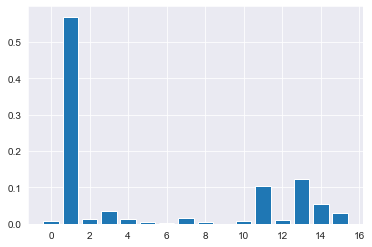

In [59]:
importance = Rmodel.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
#print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [60]:
from lightgbm import LGBMRegressor
lreg= LGBMRegressor()

In [61]:
lreg.fit(data,y)

LGBMRegressor()

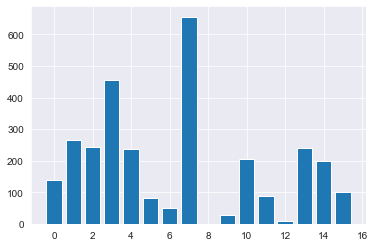

In [62]:
from matplotlib import pyplot
pyplot.bar(range(len(lreg.feature_importances_)), lreg.feature_importances_)
pyplot.show()

In [63]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

In [64]:
greg=GradientBoostingRegressor()

In [65]:
greg.fit(data,y)

GradientBoostingRegressor()

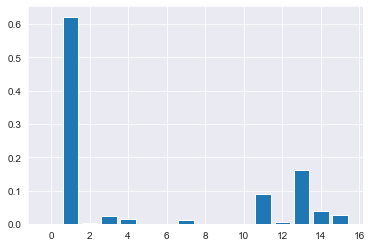

In [66]:
from matplotlib import pyplot
pyplot.bar(range(len(greg.feature_importances_)), greg.feature_importances_)
pyplot.show()

In [67]:
from xgboost import XGBRegressor, XGBRFRegressor

In [68]:
creg=XGBRFRegressor

In [73]:
creg.fit('self',data,y)

AttributeError: 'str' object has no attribute 'n_features_in_'

In [46]:
import xgboost as xgb

In [47]:
import xgboost
regressor=xgboost.XGBRegressor()

In [48]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
random_cv.fit(data,y)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   27.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  6.4min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 12.5min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 17.2min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [49]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=15,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
reg=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=15,
             min_child_weight=2, missing=np.nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
reg.fit(data,y)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=15,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
importances=reg.feature_importances_

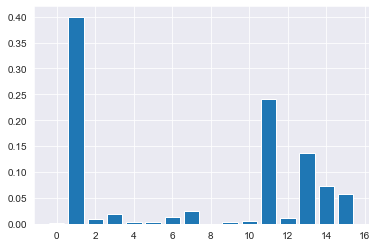

In [56]:
from matplotlib import pyplot
pyplot.bar(range(len(reg.feature_importances_)), reg.feature_importances_)
pyplot.show()

In [156]:
m2=ExtraTreesRegressor()

In [31]:
train

In [339]:
m2.fit(X,y)

ExtraTreesRegressor()

In [37]:

importances = m2.feature_importances_

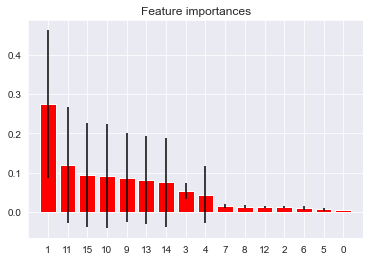

In [45]:
import matplotlib.pyplot as plt
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in m2.estimators_],
             axis=0)
plt.figure()
plt.title("Feature importances")
plt.bar(range(data.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(data.shape[1]), indices)
plt.xlim([-1, data.shape[1]])
plt.show()

In [43]:
importances

array([0.00546441, 0.27372404, 0.01315502, 0.05318813, 0.04427721,
       0.00630077, 0.00999224, 0.01572887, 0.01349004, 0.08733666,
       0.0920665 , 0.12025915, 0.01318987, 0.08139997, 0.07602521,
       0.0944019 ])

In [340]:
vals=m2.predict(test)

In [341]:
vals[0:12]

array([81.3621, 80.02  , 77.91  , 57.14  , 49.51  , 43.5327, 40.99  ,
       34.3078, 32.82  , 25.91  , 16.74  , 11.29  ])

In [71]:
tdata.head()

,idx,Temperature(F),Pressure(mm Hg),Humidity(%),WindDirection(Degrees),Speed(mph),TimeSunRise,TimeSunSet
Date,,,,,,,,
2016-12-26 08:00:50,0,48,30.47,101,187.78,4.50,2016-12-26 06:55:00,2016-12-26 17:51:00
2016-12-26 07:55:40,1,48,30.47,101,133.40,10.12,2016-12-26 06:55:00,2016-12-26 17:51:00
2016-12-26 07:50:49,2,48,30.47,101,160.69,5.62,2016-12-26 06:55:00,2016-12-26 17:51:00
2016-12-26 07:45:51,3,48,30.47,101,144.56,7.87,2016-12-26 06:55:00,2016-12-26 17:51:00
2016-12-26 07:40:39,4,48,30.47,101,169.05,10.12,2016-12-26 06:55:00,2016-12-26 17:51:00


In [22]:
testin=tdata[feats].values

In [121]:
vals=Rmodel.predict(testin)

In [137]:
vals.shape

(6537,)

In [342]:
output = pd.DataFrame({
        "idx": tdata["idx"],
        "Radiation": vals 
    })
output.to_csv('etr2.csv', index=False)

In [343]:
z=pd.read_csv('etr.csv')
z=z['Radiation']

In [344]:
v=pd.read_csv('xbg_out.csv')
v=v['Radiation']
v.shape

(6537,)

In [345]:
e=pd.read_csv('out_best.csv')
e=e['Radiation']
e.shape

(6537,)

In [37]:
e.shape

(6537,)

In [38]:
e[5]

46.18453253920001

In [383]:
vals[0]

81.36210000000003

In [411]:
final=(0.7*z+0.1*vals+0.2*v)

In [123]:
hh=final

In [412]:
final[0:12]

0     79.012466
1     80.010618
2     77.819966
3     57.148184
4     49.506773
5     43.225979
6     40.997592
7     34.034960
8     32.822191
9     25.905216
10    16.751303
11    11.285109
Name: Radiation, dtype: float64

In [396]:
final=np.array(final)

In [397]:
output = pd.DataFrame({
        "idx": tdata["idx"],
        "Radiation":  final
    })
output.to_csv('output.csv', index=False)

In [104]:
import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow.keras.layers as L
import tensorflow.keras.models as M
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
#import tensorflow_addons as tfa

print('Tensorflow version:', tf.__version__)

### File Operations ###
import shutil

Tensorflow version: 2.3.0


In [107]:
import os
SEED=42
def set_seed(seed):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(SEED)

In [108]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
    
except ValueError:
    tpu = None
    #If TPU not found try with GPUs
    gpus = tf.config.experimental.list_logical_devices("GPU")
    
# Select appropriate distribution strategy for hardware
if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    print('Running on TPU ', tpu.master())  
    
elif len(gpus) > 0:
    strategy = tf.distribute.MirroredStrategy(gpus) # this works for 1 to multiple GPUs
    print('Running on ', len(gpus), ' GPU(s) ')

else:
    strategy = tf.distribute.get_strategy()
    print('Running on CPU')

# How many accelerators do we have ?
print("Number of accelerators: ", strategy.num_replicas_in_sync)
    
AUTO = tf.data.experimental.AUTOTUNE
REPLICAS = strategy.num_replicas_in_sync

Running on CPU
Number of accelerators:  1


In [109]:
BATCH_SIZE = 128
VERBOSE = 0

DISPLAY_PLOT = True
TEST_INFERENCE = True

In [110]:
def plotLoss(history, name = 'loss'):
    plt.figure(figsize=(20,8))
    
    epochs = len(history[name])
    
    plt.plot(np.arange(epochs),history[name],'-o',label='Train Loss',color='#cc0044')
    plt.plot(np.arange(epochs),history[f'val_{name}'],'-o',label='Val Loss',color='#6600ff')

    x_ = np.argmin(history[f'val_{name}'] ); y_ = np.min( history[f'val_{name}'] )

    xdist = plt.xlim()[1] - plt.xlim()[0]; ydist = plt.ylim()[1] - plt.ylim()[0]

    plt.scatter(x_,y_,s=200,color='#6600ff'); plt.text(x_-0.03*xdist,y_+0.05*ydist,f'min loss - {y_}',size=14)

    plt.ylabel(name,size=14)
    plt.title(f'Training Losses & Validation Losses')
    plt.legend()

    plt.show()

In [113]:
import pydot
def getNN(params,inp_shape=(X.shape[1],)):
    
    K.clear_session()
    
    inputs = L.Input(shape = inp_shape)
    
    x1 = L.BatchNormalization()(inputs)
    x1 = L.Dropout(params['dropout_rates'][0])(x1)
    x = L.Dense(params['hidden_units'][0], activation = 'elu')(x1)
    
    for i in range(1,len(params['hidden_units'])):
        x1 = L.BatchNormalization()(x)
        x1 = L.Dropout(params['dropout_rates'][i])(x1)
        x = L.Dense(params['hidden_units'][i], activation = 'elu')(x1)
    
    x = L.BatchNormalization()(x)
    x = L.Dropout(params['dropout_rates'][-1])(x)
    out = L.Dense(1, dtype='float32')(x)
    
    model = M.Model(inputs = inputs, outputs = out)
    
    LR = 1e-2 * strategy.num_replicas_in_sync
    
    def rmse_loss(y_true, y_pred):
        return K.sqrt(K.mean((y_true-y_pred)**2))
    model.compile(optimizer = tf.optimizers.Adam(LR), loss=rmse_loss, metrics=[tf.keras.metrics.MeanAbsoluteError(name='mae')])
    
    return model

params = {'hidden_units': [64,256, 32], 'dropout_rates': [0.05, 0.15, 0.25, 0.3]}

tf.keras.utils.plot_model(getNN(params),show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [ ]:
    
    ### Out of Fold Predictions ###
    oof_preds = []
    oof_targets = []
    oof_datetime = []
    
    ### Test set Predictions ###
    test_preds = np.zeros_like(y_test,dtype='float32')
    
    ### Directory to save results ###
    DIR_PATH = './NeuralN/'
    if os.path.exists(DIR_PATH):
        shutil.rmtree(DIR_PATH)
    os.mkdir(DIR_PATH)
    
    set_seed(SEED)
    
    for fold, (idxT, idxV) in enumerate(kfcv.split(train)):
        
        if LOGS:
            print()
            print("#"*100)
            print(f"#### Fold {fold}: ")
        X_train_, y_train_ = X.iloc[idxT].copy(), y.iloc[idxT].copy()
        X_val_, y_val_ = X.iloc[idxV].copy(), y.iloc[idxV].copy()
        X_test_ = X_test.copy()
        